In [177]:
# Summary of the data:

# The dataset contains information about diabetes patients, including features like pregnancies, glucose level, blood pressure, skin thickness, insulin level, BMI, diabetes pedigree function, and age. 

# Exploratory data analysis (EDA) was performed using visualizations like bar plots and histograms to understand the distribution of each feature and their relationship with the outcome (diabetes or no diabetes).

# Data cleaning involved handling missing values and removing duplicate entries.

# Correlation analysis was conducted to identify potential relationships between different features.

# Feature engineering was performed by dropping the 'SkinThickness' and 'BloodPressure' columns, as they were deemed less relevant.

# Machine learning models, including logistic regression, decision tree classifier, and random forest classifier, were trained and evaluated using accuracy score to predict diabetes outcomes.

# Quantiles were calculated for specific features to gain insights into their distribution.

# The problem addressed in this code is the prediction of diabetes outcomes based on various patient characteristics. The goal is to build a machine learning model that can accurately classify individuals as having diabetes or not, given features such as pregnancies, glucose level, insulin level, BMI, age, etc.

# Solution:

# The provided code offers a solution to this problem by utilizing machine learning techniques. It performs the following steps:

# 1. Data Exploration and Preprocessing:
#    - Loads the diabetes dataset and examines its structure, including head, tail, shape, and information.
#    - Checks for missing values and duplicates.
#    - Conducts exploratory data analysis (EDA) using visualizations to understand feature distributions and relationships with the outcome.


# 2. Model Training and Evaluation:
#    - Splits the data into training and testing sets.
#    - Creates pipelines that include data scaling (StandardScaler) and different classification models:
#      - Logistic Regression
#      - Decision Tree Classifier
#      - Random Forest Classifier
#    - Trains each model on the training data.
#    - Evaluates model performance on the testing data using accuracy score.

# 3. Further Analysis:
#    - Generates additional visualizations (e.g., histogram , Barplot) to gain deeper insights.
#    - Calculates quantiles for specific features.

# By following these steps, the code provides a comprehensive approach to address the diabetes prediction problem using machine learning. The choice of the best model depends on the desired trade-off between accuracy, interpretability, and complexity.


In [177]:
#Import Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [178]:
#Load the Dataset

df=pd.read_csv('diabetes.csv')

In [179]:
df.shape

(768, 9)

In [180]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [181]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [184]:
#checking the null values 

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [185]:
#checking the duplicate values

df.duplicated().sum()

0

In [186]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
15,7,100,0,0,0,30.0,0.484,32,1
400,4,95,64,0,0,32.0,0.161,31,1
371,0,118,64,23,89,0.0,1.731,21,0
500,2,117,90,19,71,25.2,0.313,21,0
434,1,90,68,8,0,24.5,1.138,36,0


In [187]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [188]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [189]:
df['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

<Axes: xlabel='Pregnancies'>

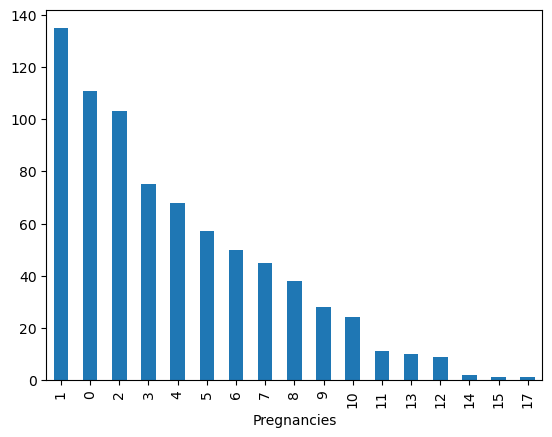

In [190]:
df['Pregnancies'].value_counts().plot(kind='bar')

Checking the realationship of Pregnancies with Outcome

<Axes: xlabel='Outcome', ylabel='Pregnancies'>

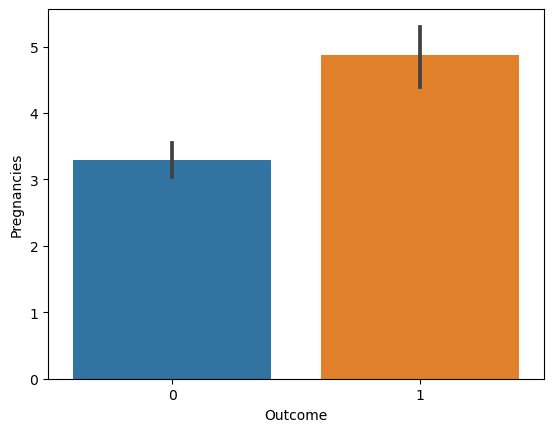

In [191]:
sns.barplot(x=df['Outcome'],y=df['Pregnancies'])

Those women who has Pregnancies of more then three there is high chances is that they will be Diabitc patient 

In [192]:
a=df['Outcome']==1
b=df[a]
print("Avreage Pregnancies of Diabetes Person is :",b['Pregnancies'].median())

Avreage Pregnancies of Diabetes Person is : 4.0


In [193]:
df['Glucose'].value_counts()

Glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: count, Length: 136, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Glucose', ylabel='Count'>

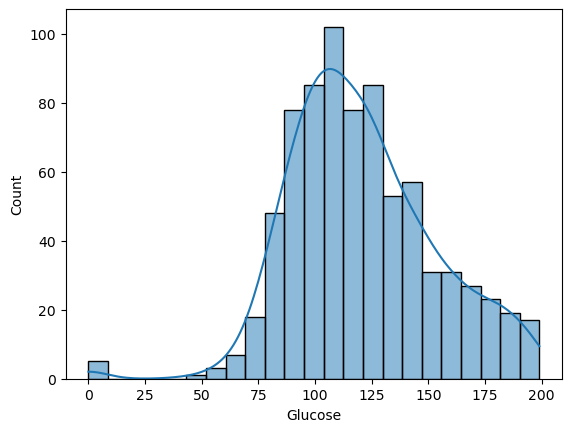

In [194]:
sns.histplot(data=df,x=df['Glucose'],kde=True)

Checking the realationship of Glucose with Outcome

<Axes: xlabel='Outcome', ylabel='Glucose'>

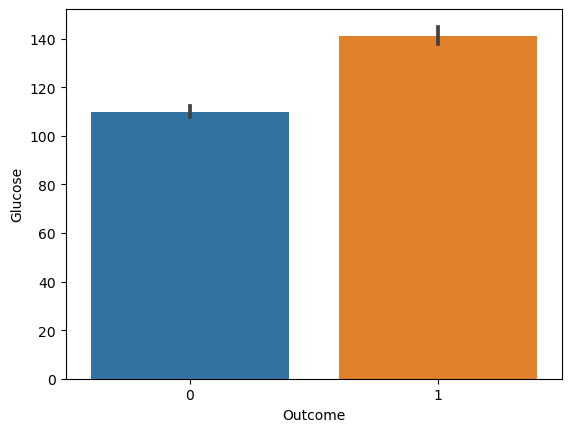

In [26]:
sns.barplot(x=df['Outcome'],y=df['Glucose'])

In [195]:
a=df['Outcome']==1
b=df[a]
print("Avreage Glucose of Diabetes Person is :",b['Glucose'].median())

Avreage Glucose of Diabetes Person is : 140.0


In [196]:
df['BloodPressure'].value_counts()

BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: count, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BloodPressure', ylabel='Count'>

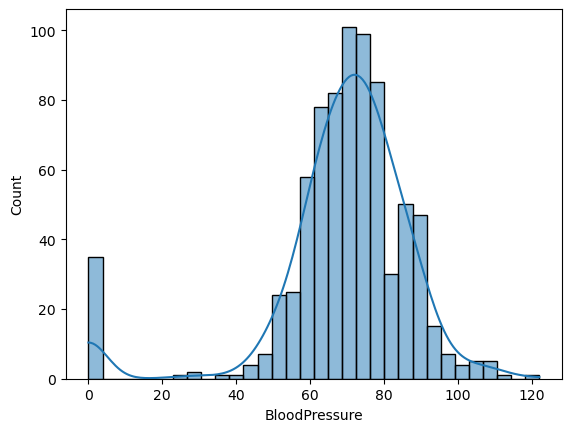

In [203]:
sns.histplot(x=df['BloodPressure'],kde=True) 

Checking the realationship of BloodPressure with Outcome

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

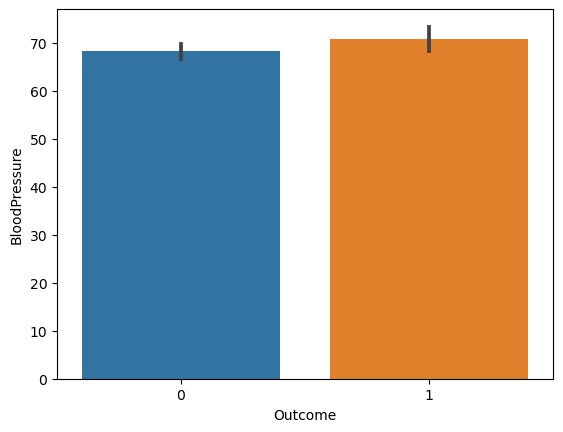

In [204]:
sns.barplot(x=df['Outcome'],y=df['BloodPressure'])

In [205]:
a=df['Outcome']==1
b=df[a]
print("Avreage BloodPressure of Diabetes Person is :",b['BloodPressure'].median())

Avreage BloodPressure of Diabetes Person is : 74.0


In [206]:
df['SkinThickness'].value_counts()

SkinThickness
0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: count, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SkinThickness', ylabel='Count'>

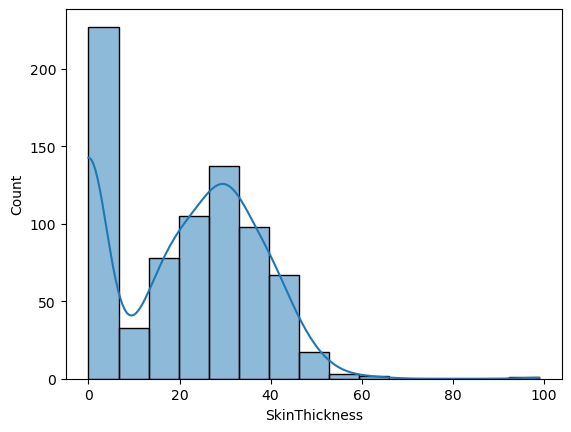

In [207]:
sns.histplot(x=df['SkinThickness'],kde=True)

Checking the realationship of SkinThickness with Outcome

<Axes: xlabel='Outcome', ylabel='SkinThickness'>

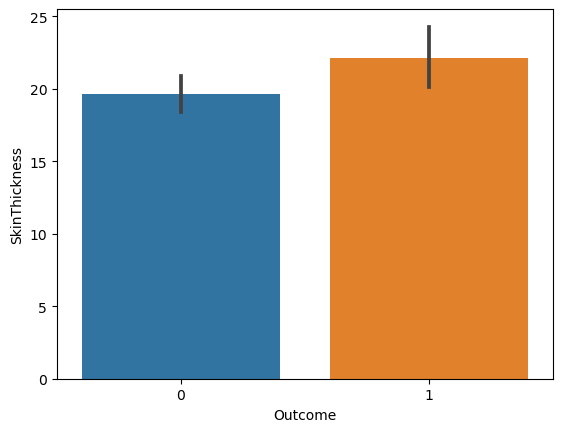

In [208]:
sns.barplot(x=df["Outcome"],y=df["SkinThickness"])

In [209]:
a=df['Outcome']==1
b=df[a]
print("Avreage SkinThickness of Diabetes Person is :",b['SkinThickness'].median())

Avreage SkinThickness of Diabetes Person is : 27.0


In [210]:
df['Insulin'].value_counts()

Insulin
0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: count, Length: 186, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Insulin', ylabel='Count'>

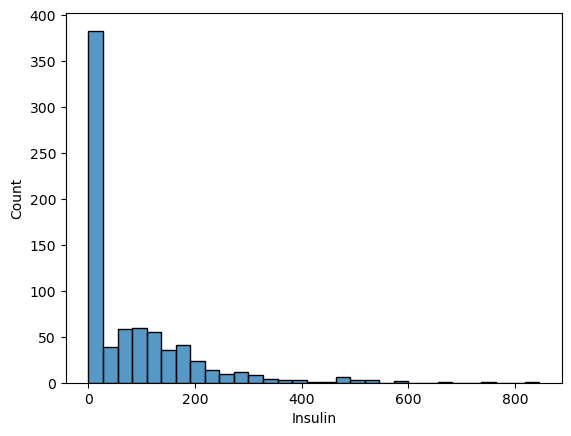

In [211]:
sns.histplot(x=df['Insulin'])

Checking the realationship of Insulin with Outcome

<Axes: xlabel='Outcome', ylabel='Insulin'>

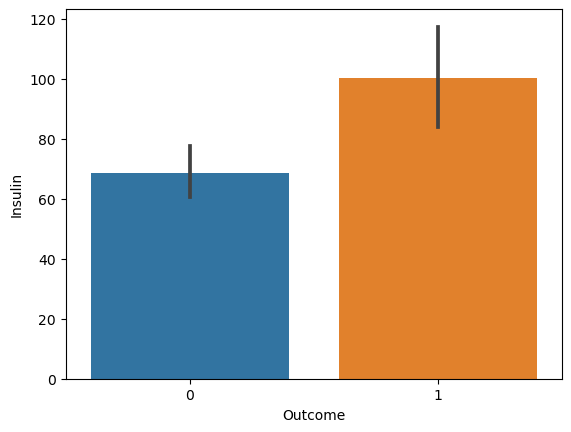

In [212]:
sns.barplot(x=df["Outcome"],y=df["Insulin"])

In [213]:
df["BMI"].value_counts()

BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: count, Length: 248, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BMI', ylabel='Count'>

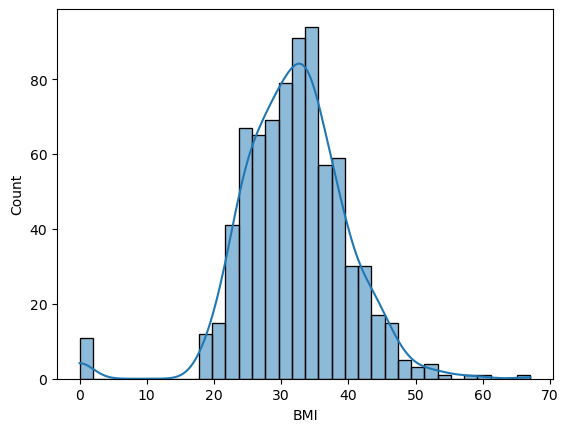

In [214]:
sns.histplot(x=df['BMI'],kde=True)

Checking the realationship of BMI with Outcome

<Axes: xlabel='Outcome', ylabel='BMI'>

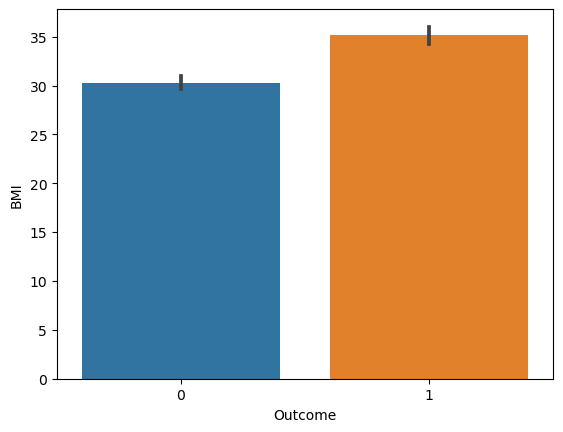

In [215]:
sns.barplot(x=df['Outcome'],y=df['BMI'])

In [216]:
a=df['Outcome']==1
b=df[a]
print("Avreage BMI of Diabetes Person is :",b['BMI'].median())

Avreage BMI of Diabetes Person is : 34.25


In [217]:
df["DiabetesPedigreeFunction"].value_counts()

DiabetesPedigreeFunction
0.258    6
0.254    6
0.268    5
0.207    5
0.261    5
        ..
1.353    1
0.655    1
0.092    1
0.926    1
0.171    1
Name: count, Length: 517, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

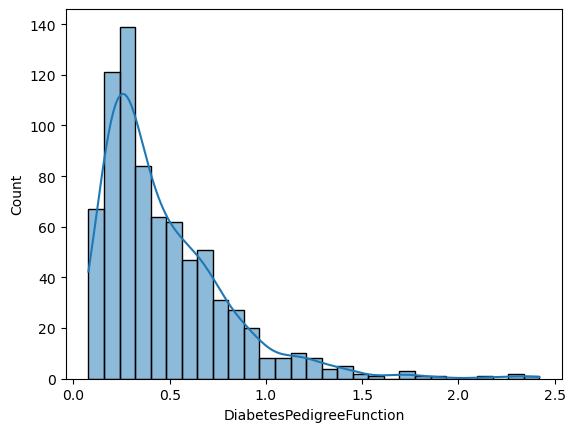

In [218]:
sns.histplot(x=df['DiabetesPedigreeFunction'],kde=True)

Checking the realationship of DiabetesPedigreeFunction with Outcome

<Axes: xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

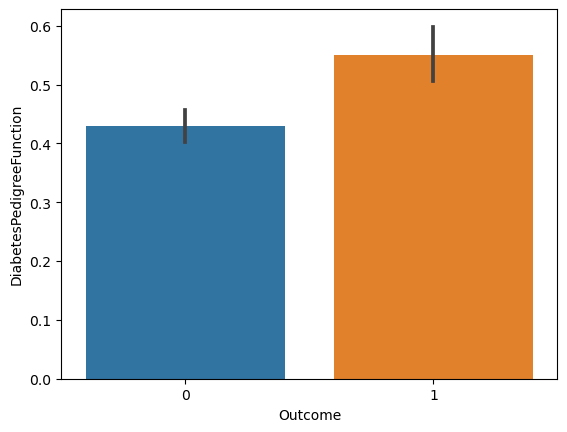

In [219]:
sns.barplot(x=df['Outcome'],y=df['DiabetesPedigreeFunction'])

In [220]:
df['Age'].value_counts()

Age
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: count, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

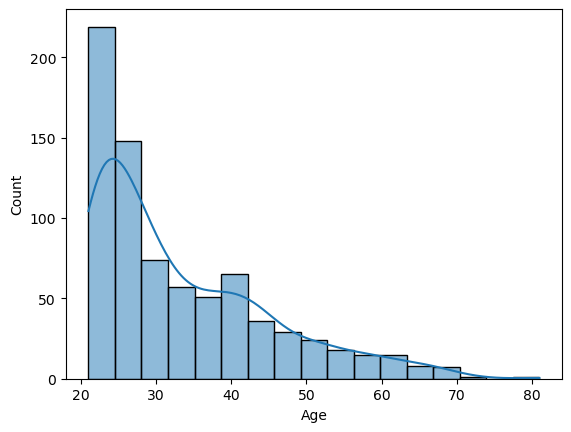

In [221]:
sns.histplot(x=df['Age'],kde=True)

Checking the realationship of Age with Outcome

<Axes: xlabel='Outcome', ylabel='Age'>

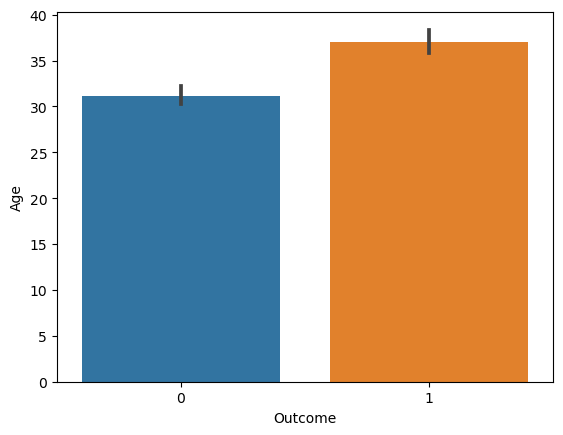

In [222]:
sns.barplot(x=df["Outcome"],y=df["Age"])

In [223]:
a=df['Outcome']==1
b=df[a]
print("Avreage Age of Diabetes Person is :",b['Age'].median())

Avreage Age of Diabetes Person is : 36.0


In [224]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: ylabel='count'>

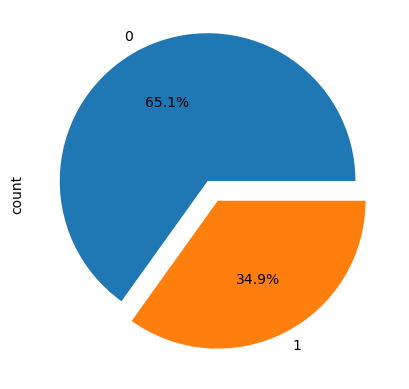

In [225]:
df["Outcome"].value_counts().plot(kind="pie",autopct="%0.1f%%",explode=[0.1,0.05])

CAPPING OUTLIER

In [226]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: xlabel='DiabetesPedigreeFunction'>

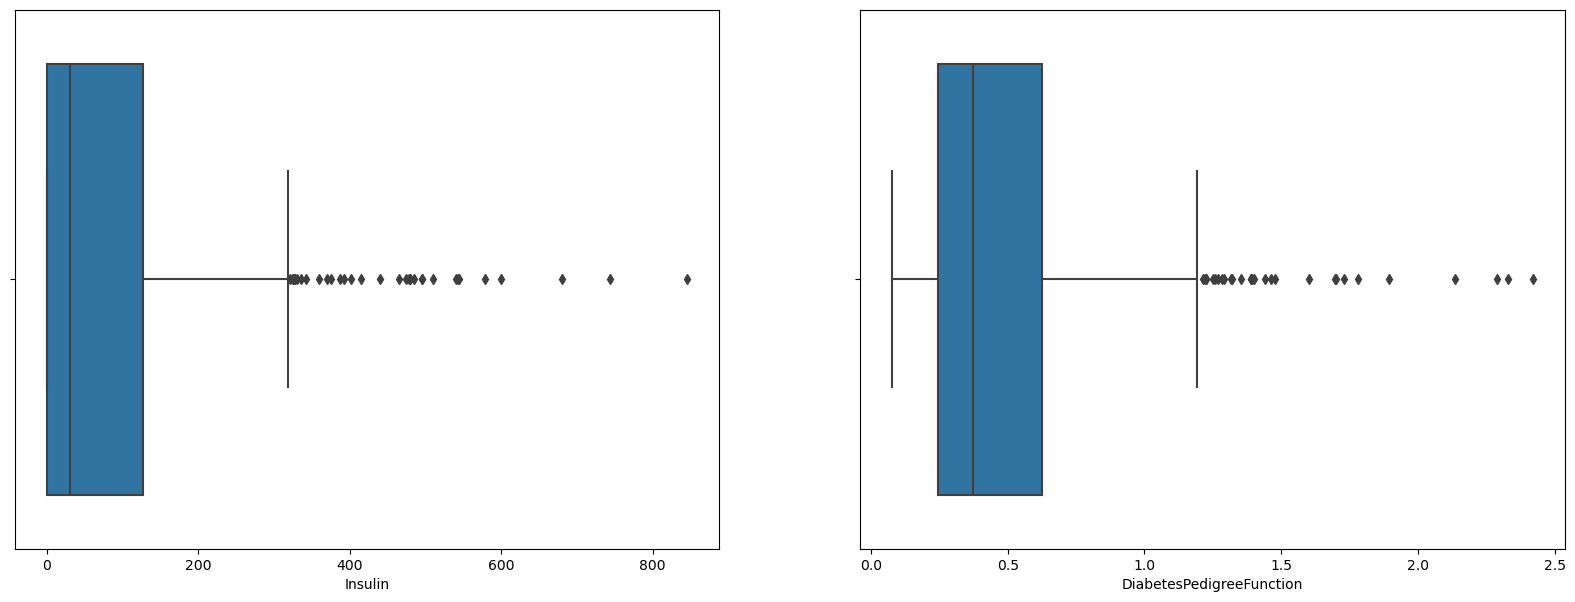

In [227]:
fig1 , ax1=plt.subplots(1,2,figsize=(20,7))

sns.boxplot(x=df["Insulin"],ax=ax1[0])
sns.boxplot(x=df["DiabetesPedigreeFunction"],ax=ax1[1])

In [228]:
q1=df['Insulin'].quantile(0.25)
q3=df['Insulin'].quantile(0.75)

IQR=q3-q1

print(q1)
print(q3)
print(IQR)

0.0
127.25
127.25


In [229]:
upper_case=q3+IQR*1.5
lower_case=q1-IQR*1.5

In [230]:
df['Insulin']=np.where(df["Insulin"]>upper_case,upper_case,df['Insulin'])

<Axes: xlabel='Insulin'>

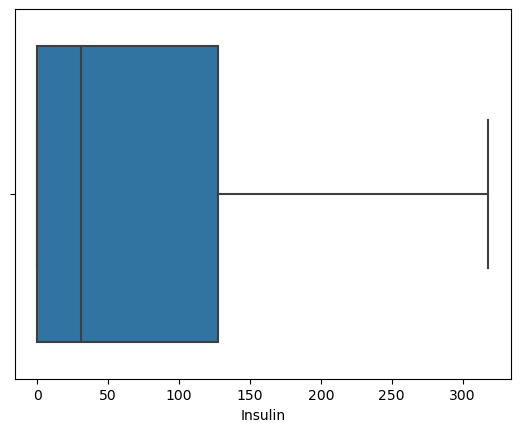

In [231]:
sns.boxplot(x=df['Insulin'])

In [232]:
q1=df['DiabetesPedigreeFunction'].quantile(0.25)
q3=df['DiabetesPedigreeFunction'].quantile(0.75)
IQR=q3-q1

upper_case=q3+IQR*1.5
lower_case=q1-IQR*1.5

df['DiabetesPedigreeFunction']=np.where(df['DiabetesPedigreeFunction']>upper_case,upper_case,df['DiabetesPedigreeFunction'])

<Axes: xlabel='DiabetesPedigreeFunction'>

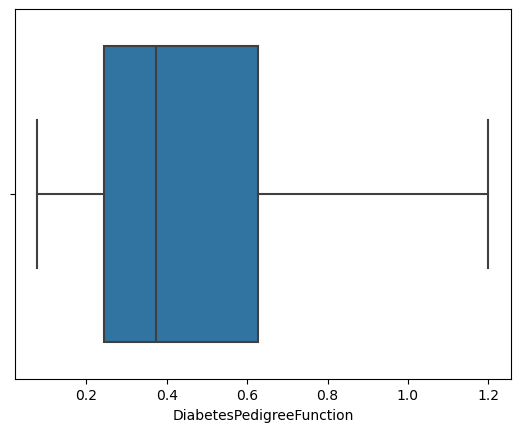

In [233]:
sns.boxplot(x=df['DiabetesPedigreeFunction'])

SPLITING THE DATA

In [234]:
x=df.drop(columns=['Outcome'])
y=df['Outcome']

In [235]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0.0,33.6,0.627,50
1,1,85,66,29,0.0,26.6,0.351,31
2,8,183,64,0,0.0,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,1.200,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,0.0,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,0,0.0,30.1,0.349,47


In [236]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [238]:
# Import Necessary Libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

In [239]:
#spliting data in ration of 80:20
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

# Applying LogisticRegression

In [240]:
from sklearn.linear_model import LogisticRegression

step1=StandardScaler()

step2=LogisticRegression()

Pipe=make_pipeline(step1,step2)

Pipe.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [241]:
pred=Pipe.predict(x_test)
print("The accuracy of LogisticRegression is :",accuracy_score(y_test,pred))

The accuracy of LogisticRegression is : 0.7662337662337663


# Applying DecisionTreeClassifier

In [242]:
from sklearn.tree import DecisionTreeClassifier

step1=StandardScaler()

step2=DecisionTreeClassifier(max_depth=2)

Pipe=make_pipeline(step1,step2)

Pipe.fit(x_train,y_train)

pred=Pipe.predict(x_test)

print("The accuracy of DecisionTreeClassifier is :",accuracy_score(y_test,pred))


The accuracy of DecisionTreeClassifier is : 0.7857142857142857


#  Applying RandomForestClassifier

In [243]:
from sklearn.ensemble import RandomForestClassifier

step1=StandardScaler()

step2=RandomForestClassifier()

Pipe=make_pipeline(step1,step2)

Pipe.fit(x_train,y_train)

pred=Pipe.predict(x_test)

print("The accuracy of RandomForestClassifier is :",accuracy_score(y_test,pred))

The accuracy of RandomForestClassifier is : 0.7597402597402597


In [244]:
# Summary of ML Algorithms Used:

# 1. Logistic Regression:
#    - A linear model used for binary classification problems (predicting one of two outcomes).
#    - Estimates the probability of an instance belonging to a particular class.
#    - Suitable for datasets with a clear separation between classes.
#    - Pros: Simple, interpretable, efficient.
#    - Cons: May not perform well for complex non-linear relationships.

# 2. Decision Tree Classifier:
#    - A tree-like model that makes decisions based on feature values.
#    - Splits data into subsets based on feature thresholds.
#    - Can capture non-linear relationships and interactions between features.
#    - Pros: Easy to understand, handles both numerical and categorical data.
#    - Cons: Prone to overfitting, can be unstable with small changes in data.

# 3. Random Forest Classifier:
#    - An ensemble method that combines multiple decision trees.
#    - Reduces overfitting and improves generalization by averaging predictions from multiple trees.
#    - Robust and often achieves high accuracy.
#    - Pros: High accuracy, handles high-dimensional data well.
#    - Cons: Can be computationally expensive, less interpretable than single decision trees.